In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from shapely.geometry import Point
import xlrd

In [2]:
df = pd.read_csv('../../Data/yellow_tripdata_2009-01.csv')

In [3]:
map = gpd.read_file('../../Data/ZIP CODES SHAPE/ZIP_CODE_040114.shp')

<AxesSubplot:>

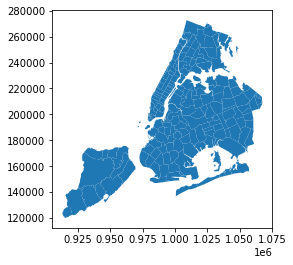

In [4]:
map.plot()

In [5]:
df=df.head(10000)

In [6]:
df

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,store_and_forward,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt
0,VTS,2009-01-04 02:52:00,2009-01-04 03:02:00,1,2.63,-73.991957,40.721567,NaN,NaN,-73.993803,40.695922,CASH,8.9,0.5,NaN,0.00,0.00,9.40
1,VTS,2009-01-04 03:31:00,2009-01-04 03:38:00,3,4.55,-73.982102,40.736290,NaN,NaN,-73.955850,40.768030,Credit,12.1,0.5,NaN,2.00,0.00,14.60
2,VTS,2009-01-03 15:43:00,2009-01-03 15:57:00,5,10.35,-74.002587,40.739748,NaN,NaN,-73.869983,40.770225,Credit,23.7,0.0,NaN,4.74,0.00,28.44
3,DDS,2009-01-01 20:52:58,2009-01-01 21:14:00,1,5.00,-73.974267,40.790955,NaN,NaN,-73.996558,40.731849,CREDIT,14.9,0.5,NaN,3.05,0.00,18.45
4,DDS,2009-01-24 16:18:23,2009-01-24 16:24:56,1,0.40,-74.001580,40.719382,NaN,NaN,-74.008378,40.720350,CASH,3.7,0.0,NaN,0.00,0.00,3.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,VTS,2009-01-03 21:33:00,2009-01-03 21:39:00,1,1.10,-73.997167,40.737425,NaN,NaN,-73.990877,40.749973,CASH,5.3,0.5,NaN,0.00,0.00,5.80
9996,VTS,2009-01-03 19:04:00,2009-01-03 19:19:00,5,2.64,-73.962212,40.779117,NaN,NaN,-73.989327,40.756197,CASH,10.1,0.0,NaN,0.00,0.00,10.10
9997,VTS,2009-01-03 09:54:00,2009-01-03 10:17:00,2,9.06,-73.873022,40.774053,NaN,NaN,-73.971993,40.796870,CASH,24.1,0.0,NaN,0.00,4.15,28.25
9998,VTS,2009-01-07 19:56:00,2009-01-07 20:04:00,1,3.02,-73.984955,40.756653,NaN,NaN,-73.997372,40.721703,Credit,11.3,1.0,NaN,2.00,0.00,14.30


In [7]:
start=df

In [9]:
start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   vendor_name            10000 non-null  object 
 1   Trip_Pickup_DateTime   10000 non-null  object 
 2   Trip_Dropoff_DateTime  10000 non-null  object 
 3   Passenger_Count        10000 non-null  int64  
 4   Trip_Distance          10000 non-null  float64
 5   Start_Lon              10000 non-null  float64
 6   Start_Lat              10000 non-null  float64
 7   Rate_Code              0 non-null      float64
 8   store_and_forward      0 non-null      float64
 9   End_Lon                10000 non-null  float64
 10  End_Lat                10000 non-null  float64
 11  Payment_Type           10000 non-null  object 
 12  Fare_Amt               10000 non-null  float64
 13  surcharge              10000 non-null  float64
 14  mta_tax                0 non-null      float64
 15  Tip

start['geo_concat']=start['Start_Lon'].astype(str)+','+start['Start_Lat'].astype(str)

start['geo_concat'].value_counts()

start

points = gpd.GeoDataFrame(start, geometry=gpd.points_from_xy(start['Start_Lon'], start['Start_Lat']))

In [83]:
points['geometry'] = points.apply(lambda x: Point((float(x.Start_Lon), 
                                                    float(x.Start_Lat))), 
                                        axis=1)


In [89]:
pointss = gpd.GeoDataFrame(points, 
                           crs = map2.crs, 
                           geometry = points['geometry'])

In [90]:
pointss

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,store_and_forward,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt,geometry
0,VTS,2009-01-04 02:52:00,2009-01-04 03:02:00,1,2.63,-73.991957,40.721567,NaN,NaN,-73.993803,40.695922,CASH,8.9,0.5,NaN,0.00,0.00,9.40,POINT (-73.99196 40.72157)
1,VTS,2009-01-04 03:31:00,2009-01-04 03:38:00,3,4.55,-73.982102,40.736290,NaN,NaN,-73.955850,40.768030,Credit,12.1,0.5,NaN,2.00,0.00,14.60,POINT (-73.98210 40.73629)
2,VTS,2009-01-03 15:43:00,2009-01-03 15:57:00,5,10.35,-74.002587,40.739748,NaN,NaN,-73.869983,40.770225,Credit,23.7,0.0,NaN,4.74,0.00,28.44,POINT (-74.00259 40.73975)
3,DDS,2009-01-01 20:52:58,2009-01-01 21:14:00,1,5.00,-73.974267,40.790955,NaN,NaN,-73.996558,40.731849,CREDIT,14.9,0.5,NaN,3.05,0.00,18.45,POINT (-73.97427 40.79095)
4,DDS,2009-01-24 16:18:23,2009-01-24 16:24:56,1,0.40,-74.001580,40.719382,NaN,NaN,-74.008378,40.720350,CASH,3.7,0.0,NaN,0.00,0.00,3.70,POINT (-74.00158 40.71938)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,VTS,2009-01-03 21:33:00,2009-01-03 21:39:00,1,1.10,-73.997167,40.737425,NaN,NaN,-73.990877,40.749973,CASH,5.3,0.5,NaN,0.00,0.00,5.80,POINT (-73.99717 40.73743)
9996,VTS,2009-01-03 19:04:00,2009-01-03 19:19:00,5,2.64,-73.962212,40.779117,NaN,NaN,-73.989327,40.756197,CASH,10.1,0.0,NaN,0.00,0.00,10.10,POINT (-73.96221 40.77912)
9997,VTS,2009-01-03 09:54:00,2009-01-03 10:17:00,2,9.06,-73.873022,40.774053,NaN,NaN,-73.971993,40.796870,CASH,24.1,0.0,NaN,0.00,4.15,28.25,POINT (-73.87302 40.77405)
9998,VTS,2009-01-07 19:56:00,2009-01-07 20:04:00,1,3.02,-73.984955,40.756653,NaN,NaN,-73.997372,40.721703,Credit,11.3,1.0,NaN,2.00,0.00,14.30,POINT (-73.98495 40.75665)


In [91]:
points.crs

In [12]:
points.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   vendor_name            10000 non-null  object  
 1   Trip_Pickup_DateTime   10000 non-null  object  
 2   Trip_Dropoff_DateTime  10000 non-null  object  
 3   Passenger_Count        10000 non-null  int64   
 4   Trip_Distance          10000 non-null  float64 
 5   Start_Lon              10000 non-null  float64 
 6   Start_Lat              10000 non-null  float64 
 7   Rate_Code              0 non-null      float64 
 8   store_and_forward      0 non-null      float64 
 9   End_Lon                10000 non-null  float64 
 10  End_Lat                10000 non-null  float64 
 11  Payment_Type           10000 non-null  object  
 12  Fare_Amt               10000 non-null  float64 
 13  surcharge              10000 non-null  float64 
 14  mta_tax                0 non-nu

In [51]:
points2=points[['Trip_Distance','Fare_Amt','geometry']]

In [17]:
points2

,Trip_Distance,Fare_Amt,geometry
0,2.63,8.9,POINT (-73.99196 40.72157)
1,4.55,12.1,POINT (-73.98210 40.73629)
2,10.35,23.7,POINT (-74.00259 40.73975)
3,5.00,14.9,POINT (-73.97427 40.79095)
4,0.40,3.7,POINT (-74.00158 40.71938)
...,...,...,...
9995,1.10,5.3,POINT (-73.99717 40.73743)
9996,2.64,10.1,POINT (-73.96221 40.77912)
9997,9.06,24.1,POINT (-73.87302 40.77405)
9998,3.02,11.3,POINT (-73.98495 40.75665)


In [20]:
map

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17..."
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ..."
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20..."
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21..."


In [75]:
map2=map[['ZIPCODE','geometry']]

<AxesSubplot:>

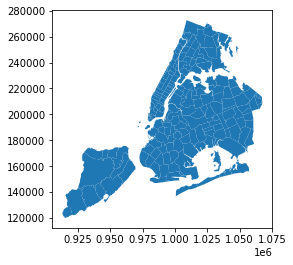

In [76]:
map2.plot()

<AxesSubplot:>

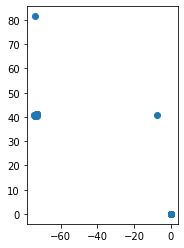

In [77]:
points2.plot()

In [52]:
print(points2.crs)

None


In [64]:
points2.crs='EPSG:4326'

In [67]:
map2.crs='EPSG:4326'

In [73]:
points2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [74]:
map2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [92]:
within_points = gpd.sjoin(pointss,map2, op = 'within')

In [93]:
within_points

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,store_and_forward,End_Lon,...,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt,geometry,index_right,ZIPCODE
